# 1.) Import the Credit Card Fraud Data From CCLE

In [70]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso

In [71]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [72]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/fraudTest.csv")

In [73]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 2.) Select four columns to use as features (one just be trans_date_trans)

In [74]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [75]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

# 3.) Create a your own variable out of trans_date. Create dummies for factor vars

In [76]:
type(df_select["trans_date_trans_time"][0])

str

In [77]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

<ipython-input-77-99f721e4ce0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [78]:
df_select["trans_date_trans_time"][0]

Timestamp('2020-06-21 12:14:25')

In [79]:
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

<ipython-input-79-fa4370ef92e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [80]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

In [81]:
X.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# xxx skip


In [82]:
resample_X = X
resample_y = y

# 5.) Train a Logistic regression.

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(resample_X)

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
log_reg = LogisticRegression().fit(X_normalized, resample_y)

In [86]:
X1=scaler.fit_transform(resample_X)

# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

In [88]:
yp = log_reg.predict_proba(X_normalized)[:, 1]
fpr, tpr, thresholds = roc_curve(resample_y, yp)
desired_fpr = 0.05
threshold = thresholds[np.argmin(np.abs(fpr - desired_fpr))]

In [89]:
threshold

0.009835524304623314

# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [90]:
df_temp = df_select.copy()

In [92]:
df_temp["pred"] = log_reg.predict(resample_X)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [93]:
df_temp = df_temp[["pred", "is_fraud", "amt"]]

In [94]:
df_temp.head()
# Which combinations of "pred" and "if_fraud" do we profit .02*amt, which cases do 
# we lose -amt??

,pred,is_fraud,amt
0,0,0,2.86
1,0,0,29.84
2,0,0,41.28
3,0,0,60.05
4,0,0,3.19


In [95]:
df1= df_temp.loc[df_temp['pred']==0]
df1=df1.reset_index()
leng=len(df1)
profit=0
for i in range(0,leng):
  if df1.loc[i,'is_fraud']==0 :
    profit = profit + 0.02*df1.loc[i,'amt']
  if df1.loc[i,'is_fraud']==1 :
    profit = profit - df1.loc[i,'amt']
profit

-35132.44080000058

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [96]:
model = LogisticRegression("l1", solver = 'liblinear')
model.fit(X1, resample_y)
model.coef_

array([[ 0.3296658 , -0.12165078,  0.00675378, -0.06866844, -0.07648629,
         0.10640804,  0.02366191,  0.42937907, -0.06880419, -0.1133467 ,
        -0.09721301,  0.32442029,  0.        , -0.01000645,  0.40846889,
         0.10283809, -0.91622896]])

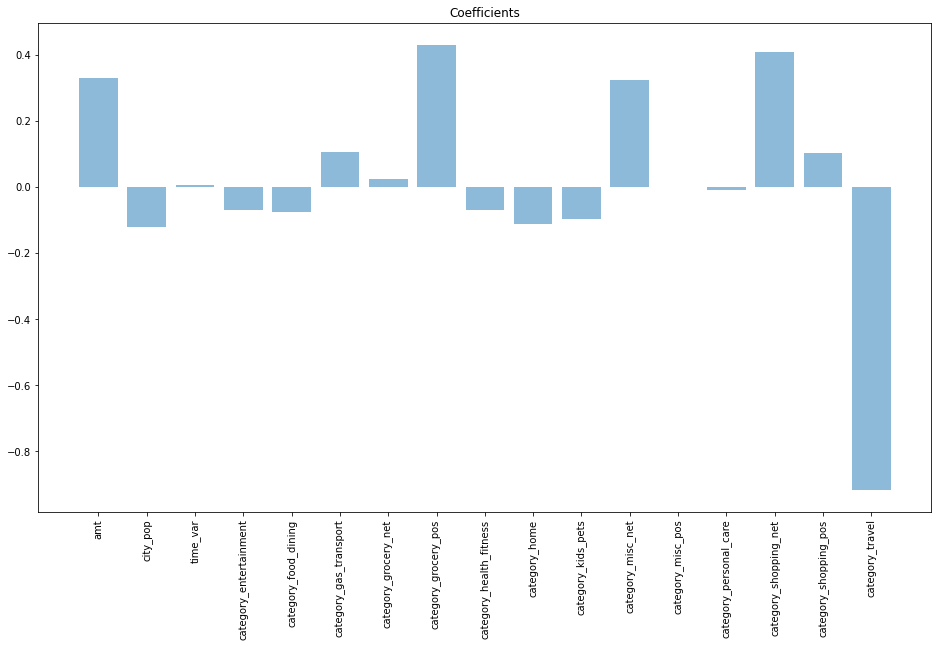

In [97]:
objects=list(X.columns)
plt.figure(figsize=(16,9))
plt.bar(objects,model.coef_[0],align='center', alpha=0.5)
plt.xticks(objects, rotation=90)
plt.title('Coefficients')
plt.show()

Yes, because most coefficients are different than 0 except for one variable. Thus, it makes lasso model significant. However, time, grocery and personal care is close to 0, we could exclude them when building the model.